# Generate the initial dataset

In [2]:
from generate_dataset import create_dataset
X, y = create_dataset(1000)

# Spit Dataset into training and testing

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normilize the data with StandardScaler

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[1]))
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[1]))

print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")
print(X_train[:5])

Training set shape: (800, 50), Test set shape: (200, 50)
[[ 0.37523911  0.40793165  0.23597626  0.37552626  0.14465571  0.27274617
   0.28315054  0.2267013   0.17483204  0.28041255  0.27936597  0.35053707
   0.23548174  0.28190248  0.17714117  0.25190858  0.34209655  0.50709758
   0.27109065  0.26531868  0.25873853  0.20306934  0.20273211  0.25649335
   0.21295973  0.41552863  0.16916562  0.25079491  0.3471063   0.11630049
   0.27916163  0.2767796   0.31749687  0.16857689  0.23921474  0.21477458
   0.33705542  0.21795564  0.20735398  0.24442702  0.25311827  0.31435904
   0.19408365  0.2396765   0.09812061  0.29685463  0.12377204  0.21416073
   0.13958995  0.24089236]
 [ 0.24733225  0.3666534   0.28741563  0.36232507  0.3242297   0.34384426
   0.2620083   0.25637587  0.39825616  0.38313163  0.28372583  0.39901674
   0.35928264  0.46059807  0.45874126  0.36777923  0.32170121  0.46473275
   0.3020985   0.57299523  0.31140805  0.44081127  0.24087435  0.44683994
   0.43101654  0.48946819  0

# Train the classification model

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        51
           3       1.00      1.00      1.00        50

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
 [[55  0  0  0]
 [ 0 44  0  0]
 [ 0  0 51  0]
 [ 0  0  0 50]]


# Visualize the confusion matrix

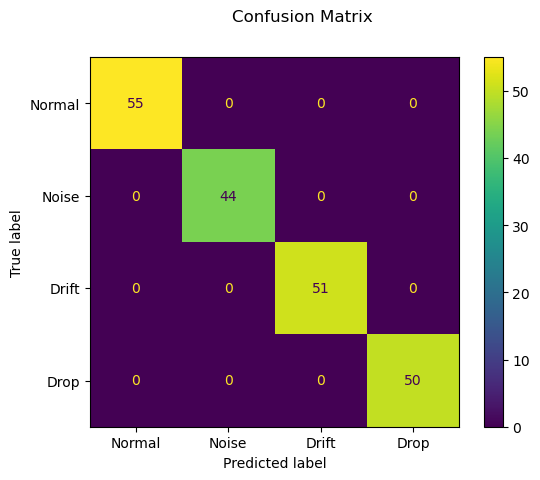

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=["Normal", "Noise", "Drift", "Drop"])
disp.figure_.suptitle("Confusion Matrix")
plt.show()


# LSTM Model


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Example LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(4, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the LSTM model
lstm_loss, lstm_acc = model.evaluate(X_test_lstm, y_test)
print(f"LSTM Model Accuracy: {lstm_acc}")


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4417 - loss: 1.3336 - val_accuracy: 0.6625 - val_loss: 1.1290
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7270 - loss: 1.2605 - val_accuracy: 0.7188 - val_loss: 0.8475
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7509 - loss: 0.7932 - val_accuracy: 0.7188 - val_loss: 0.7757
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7223 - loss: 0.8614 - val_accuracy: 0.6875 - val_loss: 0.9668
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7484 - loss: 0.8623 - val_accuracy: 0.7188 - val_loss: 0.7110
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7173 - loss: 0.8355 - val_accuracy: 0.7250 - val_loss: 0.7191
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7687 - loss: 0.6802 - val_accuracy: 0.7250 - val_loss: 0.6997
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7677 - loss: 0.6442 - val_accuracy: 0.7250 - v

# Deploy the model

In [21]:
import joblib

# Save the Random Forest model
joblib.dump(clf, 'anomaly_classifier.pkl')
print("Model saved as 'anomaly_classifier.pkl'")


Model saved as 'anomaly_classifier.pkl'
